<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/09_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미분
* $y=f(x)$에서 한 순간의 변화량을 구하는 것
  - $x$가 아주아주 조금 변화가 되었을 때 $y$는 얼마만큼 변화했는가
* 변화량 = $\frac{y의변화량}{x의변화량}$
---
$x$가 아주아주 조금($h$만큼) 변화 되었을 때
$$
\frac{df(x)}{dx} = \lim_{h\to 0} \frac{f(x+h) - f(x)}{ (x+h)-x }=\lim_{h\to 0} \frac{f(x+h) - f(x)}{ h }
$$


In [ ]:
# 미분 구현
import numpy as np

# 미분의 나쁜 구현
def numerical_diff(f, x):
  '''
    f : 미분 대상 함수 ( 변화량을 구할 함수 )
    x : x인 순간의 변화량을 구하기 위함
  '''
  # 분모를 0으로 두는 것은 불가능
  # x인 순간을 구해서 h를 0으로 설정하는 것이 아닌, 0에 아주아주 가까운 숫자로 지정
  #  1. 수학적으로 분모는 0이 올 수가 없다.
  #  2. 의미적으로도 변화량을 구하는 것이기 때문에 0에 무한히 가깝게 가는 것이지, 0이 아님

  h = 1e-50 # 소숫점 밑으로 0이 49개
  return (f(x+h) - f(x)) / h

너무나 작은 숫자로 나눗셈을 하게 되면, 컴퓨팅 시스템상 부동소숫점 오류가 발생한다. (반올림오차)

In [ ]:
np.float32(1e-50)

0.0

In [ ]:
1 / np.float32(1e-50) # 1 / 0.0 -> inf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

# 전방차분과 중앙차분을 이용한 미분
$$
\frac{ df(x) }{ dx }  =  \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ x+h - (x-h) } = \lim_{h\to 0} \frac{f(x+h) - f(x-h)}{ 2h }
$$

In [ ]:
# 향상된 미분 함수
def numerical_diff(f, x):
  h = 1e-4 # 0.0001이 가장 적당하다고 알려져 있습니다.
  return (f(x+h) - f(x-h)) / (2*h)

실세 $x$값을 집어 넣고 미분을 계산하는 것을 **수치미분**이라고 한다.

# 수치미분의 예시
$$
f(x)=y = 0.01x^2 + 0.1x
$$

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

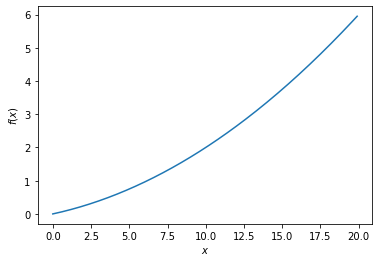

In [ ]:
x = np.arange(0.0, 20, 0.1)
y = function_1(x)

plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.plot(x, y)
plt.show()

In [ ]:
print("x가 5일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 5)))
print("x가 10일 때의 미분값 : {:.1f}".format(numerical_diff(function_1, 10)))

x가 5일 때의 미분값 : 0.2
x가 10일 때의 미분값 : 0.3


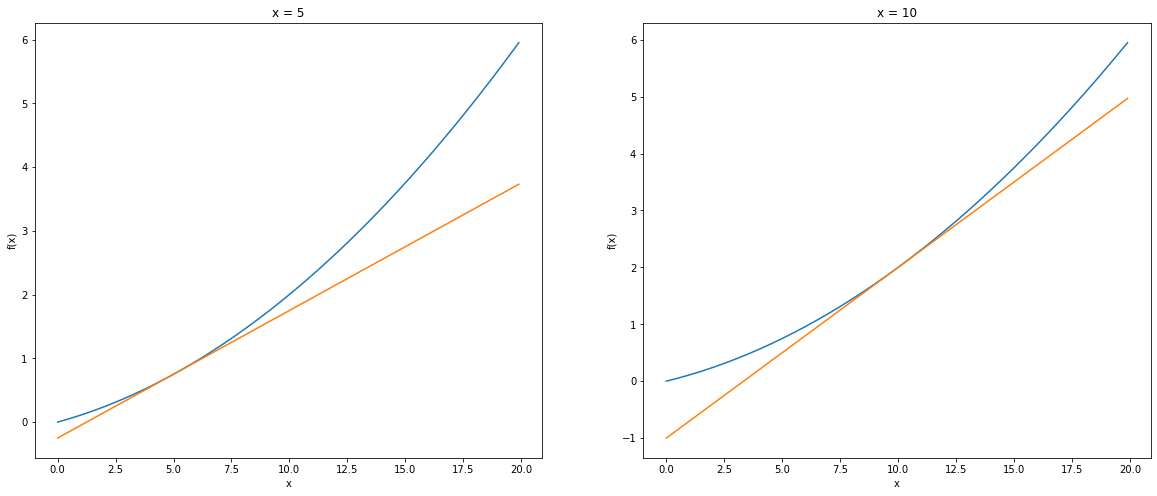

In [ ]:
# 미분값을 이용한 접선 시각화
def tangent_line(f, x):
    d = numerical_diff(f, x) # 미분을 통해 기울기를 구한다.
    y = f(x) - d*x # 기울기를 활용해서 y값을 구한다.
    return lambda t: d*t + y # y값을 토대로 접선을 그린다.

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()

# 편미분
* 위 예에서는 $x$(인수 또는 변수가 됨) 1개
* 2개 이상의 인수에 대한 미분을 **편미분** 이라고 한다.
* 한 쪽만( 인수 하나만 ) 신경써서 미분을 하겠다.
$$
f(x_0, x_1) = x^2_0 + x^2_1
$$

In [ ]:
# x : numpy 배열
def function_2(x):
  return x[0] ** 2 + x[1]**2

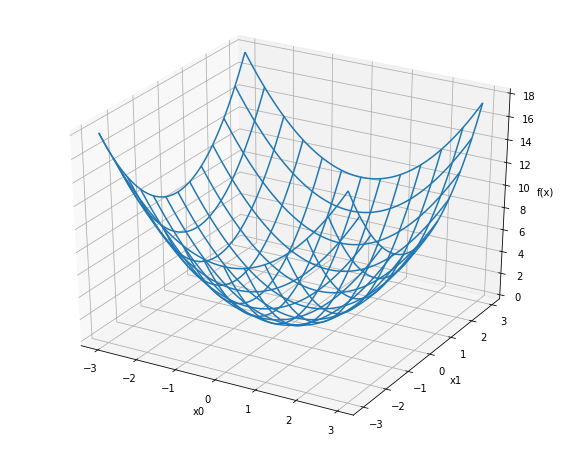

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()

$$
f(x_0, x_1) = x^2_0 + x^2_1
$$

* 편미분은 한 쪽을 **무시**한 채로 미분을 하는 것
* 내가 미분하고자 하는 변수를 제외 하고는 모두다 **상수**로 처리
* **상수**는 미분하면 0이 됩니다.
* $f(x) = x^2 + 3$을 미분하면? $3$은 상수이기 때문에 $f(x)$를 미분하면 $2x$가 된다.
* $f(x_0, x_1) = x^2_0 + x^2_1$에서, $f(x_0)$로 편미분을 한다면?
  * $x_1$을 상수처럼 생각을 하게 된다.
  * $f(x_0)$로 미분하는 꼴이 된다.
  * 즉 결과는 $f(x_0)$를 미분하면? $2x_0$
* $x_0$로 편미분을 하고 싶다 -> $\frac{\partial f}{\partial x_0}$ -> $x_0$에 대한 $f$의 편미분값
* $\frac{\partial f}{\partial x_1}$ -> $2x_1$

## 문제 1
$x_0=3, x_1=4$ 일 때, $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$를 구하시오.`답 : 약 6.0`

In [ ]:
def function_tmp1(x0):
  return x0**2 + 4.0**2

print("{:.1f}".format(numerical_diff(function_tmp1, 3.0)))

6.0


## 문제 2
$x_0=3, x_1=4$ 일 때, $x_1$에 대한 편미분 $\frac{\partial f}{\partial x_1}$를 구하시오.`답 : 약 8.0`

In [ ]:
def function_tmp2(x1):
  return 3.0**2 + x1**2

print("{:.1f}".format(numerical_diff(function_tmp1, 4.0)))

8.0


# 기울기 배열(gradient)
* $x_0$에 대한 기울기와, $x_1$에 대한 기울기를 따로 구해서 확인
* $x_1$에 대한 기울기와, $x_1$에 대한 기울기를 동시에 생각하면 두 방향 모두를 고려한 기울기 값을 얻어낼 수가 있다.
  * $(\frac{\partial f}{\partial x_0} , \frac{\partial f}{\partial x_1})$
  * ($x_0$에 대한 기울기, $x_1$에 대한 기울기)
  * 기울기 배열
  * 기울기 벡터
    * 벡터 : 방향과 크기를 나타낸 것

In [ ]:
# f : 편미분 대상 함수
# x : x값이 들어있는 배열 (x0, x1)
def numerical_gradient(f, x):
  h = 1e-4
  grads = np.zeros_like(x) # x와 형상이 같은 0으로 채워진 배열을 생성

  # 각 x에 대한 편미분을 수행한다.
  for idx in range(x.size):
    tmp_val = x[idx] # 차례차례 x를 꺼내 오기

    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grads[idx] = (fxh1-fxh2) / 2*h # 미분 수행
    x[idx] = tmp_val # 원래 값으로 복원하기

  return grads

In [ ]:
result = numerical_gradient(function_2, np.array([3.0, 4.0]))
print("x = [3, 4] 일 때의 기울기 배열 : {}".format(result))

x = [3, 4] 일 때의 기울기 배열 : [6.e-08 8.e-08]


In [ ]:
result = numerical_gradient(function_2, np.array([2.0, 3.0]))
print("x = [2, 3] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([1.0, 2.0]))
print("x = [1, 2] 일 때의 기울기 배열 : {}".format(result))

result = numerical_gradient(function_2, np.array([0.0, 0.0]))
print("x = [0, 0] 일 때의 기울기 배열 : {}".format(result))

x = [2, 3] 일 때의 기울기 배열 : [4.e-08 6.e-08]
x = [1, 2] 일 때의 기울기 배열 : [2.e-08 4.e-08]
x = [0, 0] 일 때의 기울기 배열 : [0. 0.]


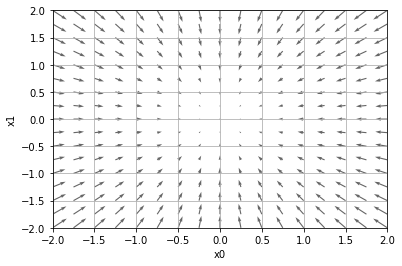

In [ ]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

* $(\frac{\partial f}{\partial x_0} , \frac{\partial f}{\partial x_1})$을 벡터로 묶어서 표현
* 최소지점으로 가기 위한 $x_0$의 방향과 크기, 최소지점으로 가기 위한 $x_1$의 방향과 크기
* 즉 기울기가 크면 클 수록 그 만큼 많이 움직여야 한다.
* 기울기가 가리키는 쪽은 각 장소에서(좌표에서) 함수의 출력값 ($x_0^2+x_1^2$)의 결괏값이 가장 작은 곳

# 경사하강법 - Gradient Descent ✨✨
* 기울기를 줄여 나가는 방법
* 손실값(Loss)을 최소로 하기위한 매개변수를 구하는 과정
* **최적화(Optimization)**라고 한다.
* 신경망에서의 매개변수는 **가중치와 편향**
* Loss를 최소화 하기위한 가중치와 편향을 구하는 과정을 최적화라고 하고, 경사하강법은 최적화 기법의 일종

## 경사하강법의 원리
* 현 위치에서 기울어진 방향으로 **일정 거리만큼 이동(Learning Rate)**
* 이동한 곳에서도 미분을 통해 기울기를 구하고, 기울기를 구한 방향으로 이동
* 이 과정을 최소화가 되는 지점을 찾을 때 까지 반복(step)

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

* $\eta$ : Learning Rate ( 하이퍼 파라미터 )
* 위 과정을 매개변수 업데이트라고 한다.

In [ ]:
# 경사하강법 구현
# f : 경사하강법을 수행할 함수
# init_x : x의 최초 지점
# lr : learning_rate
# step_num : 경사하강법 수행 횟수
def gradient_descent(f, init_x, lr = 0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    # 기울기 배열을 구한다.
    grads = numerical_gradient(f, x) # 현 위치에서의 기울기 배열을 구한다.
    print("x 좌표 : {} / 기울기 : {}".format(x, grads))

    x = x - lr*grads
  
  return x

In [ ]:
def function_2(x):
  return x[0] ** 2 + x[1] ** 2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

x 좌표 : [-3.  4.] / 기울기 : [-6.  8.]
x 좌표 : [-2.4  3.2] / 기울기 : [-4.8  6.4]
x 좌표 : [-1.92  2.56] / 기울기 : [-3.84  5.12]
x 좌표 : [-1.536  2.048] / 기울기 : [-3.072  4.096]
x 좌표 : [-1.2288  1.6384] / 기울기 : [-2.4576  3.2768]
x 좌표 : [-0.98304  1.31072] / 기울기 : [-1.96608  2.62144]
x 좌표 : [-0.786432  1.048576] / 기울기 : [-1.572864  2.097152]
x 좌표 : [-0.6291456  0.8388608] / 기울기 : [-1.2582912  1.6777216]
x 좌표 : [-0.50331648  0.67108864] / 기울기 : [-1.00663296  1.34217728]
x 좌표 : [-0.40265318  0.53687091] / 기울기 : [-0.80530637  1.07374182]
x 좌표 : [-0.32212255  0.42949673] / 기울기 : [-0.64424509  0.85899346]
x 좌표 : [-0.25769804  0.34359738] / 기울기 : [-0.51539608  0.68719477]
x 좌표 : [-0.20615843  0.27487791] / 기울기 : [-0.41231686  0.54975581]
x 좌표 : [-0.16492674  0.21990233] / 기울기 : [-0.32985349  0.43980465]
x 좌표 : [-0.1319414   0.17592186] / 기울기 : [-0.26388279  0.35184372]
x 좌표 : [-0.10555312  0.14073749] / 기울기 : [-0.21110623  0.28147498]
x 좌표 : [-0.08444249  0.11258999] / 기울기 : [-0.16888499  0.22517998]
x 좌표 

array([-6.11110793e-10,  8.14814391e-10])

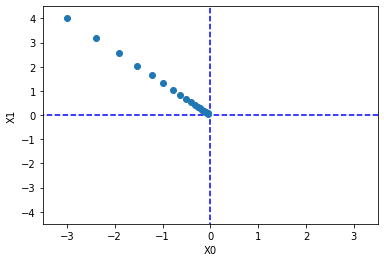

In [ ]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률(Learning Rate)이 너무 크거나 작으면 벌어지는 일들

In [ ]:
# 학습률이 너무 큰 예. lr = 10.0
init_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)
print("Learning Rate 10.0 : {}".format(result))

Learning Rate 10.0 : [-2.58983747e+13 -1.29524862e+12]


In [ ]:
# 학습률이 너무 작은 예. lr = 1e-10
init_x = np.array([-3.0, 4.0])
result, _ = gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)
print("Learning Rate 1e-10 : {}".format(result))

Learning Rate 1e-10 : [-2.99999994  3.99999992]


* Learning Rate가 너무 크면 좌표가 발산
* Learning Rate가 너무 작으면 갱신이 거의 안된다.

# 학습이 가능한 신경망 만들기
* 신경망의 학습이란?
  * Loss($L$)값을 최소화 시키는 가중치($W$)와 편향($b$)을 구한다.
* 미분은 어떻게 쓰일까?
  * $\frac{\partial L}{\partial W}$, $\frac{\partial L}{\partial b}$

$$
W=\begin{pmatrix} w_{11} & w_{21} & w_{31} \\ w_{12}&w_{22}&w_{32} \\\end{pmatrix}
$$


$$
\frac{\partial L}{\partial W}=\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}
$$


In [ ]:
# 실습에 필요한 함수들
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

## SimpleNet
* 입력을 두개 받는 `[x1, x2]` 3개의 뉴런을 가진 신경망
* 편향 고려 x, 가중치만 고려

In [ ]:
class SimpleNet:
  def __init__(self):
    # 신경망이 초기에 가지고 있어야 할 매개변수를 세팅
    # 신경망 매개변수 초기화 작업을 생성자인 __init__ 메소드에서 수행

    # 1) 정규분포 랜덤값 * 0.01 ( 실무에서는 사용이 안됨, 공부할 때만 사용 )
    # 2) 카이밍 히 초깃값( He 초깃값 ) - ReLU를 activation function으로 쓸 때 자주 사용
    # 3) 사비에르 초깃값( Xavier 초깃값 ) - Sigmoid를 activation function으로 쓸 때 자주 사용

    self.W = np.random.randn(2, 3) # 가중치를 랜덤하게 정규분포로 초기화(원래 0.01 곱해야 하는데 보기가 좀 그래서 안 넣었음.)
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    # 손실(Loss)을 구할 때 필요한 것
    # 1. 예측값 (y)
    # 2. 정답(t)
    # 3. loss 측정 함수 ( cross_entropy_error )

    z = self.predict(x)
    y = softmax(z)

    loss = cross_entropy_error(y, t)

    return loss

In [ ]:
net = SimpleNet()
print("가중치 : \n{}".format(net.W))

가중치 : 
[[ 1.81509164 -1.47779898 -0.44327992]
 [ 1.1835035   0.70338014  1.76561574]]


In [ ]:
# x는 임의로 설정
x = np.array([0.6, 0.9])
p = net.predict(x)

print("예측값 : {}".format(p))

예측값 : [ 2.15420814 -0.25363727  1.32308622]


In [ ]:
# loss 구해보기
t = np.array([1, 0, 0])
t_error = np.array([0, 1, 0])

print("정답이 0 일 때의 loss : {:.3f}".format(net.loss(x, t)))
print("정답이 1 일 때의 loss : {:.3f}".format(net.loss(x, t_error)))

정답이 0 일 때의 loss : 0.422
정답이 1 일 때의 loss : 2.830


$$
\frac{\partial L}{\partial W}=\begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{31}} \\ \frac{\partial L}{\partial w_{12}}&\frac{\partial L}{\partial w_{22}}&\frac{\partial L}{\partial w_{32}} \\\end{pmatrix}
$$

In [ ]:
# 1. Loss 구하기 위한 함수
# 2. W에 대한..
# dL / dW
# net.loss 를 미분할 함수를 따로 만들어야 한다.(W에 대한..)

def f(W):
  return net.loss(x, t)

# 혹은
# loss_W = lambda W : net.loss(x, t)

In [ ]:
# Loss를 구하는 함수 f에 대한 모든 W들의 기울기를 구할 수 있다.
# W의 각 원소에 대한 편미분이 수행된다.

dW = numerical_gradient(f, net.W)
print(dW)

[[-0.20670418  0.03540016  0.17130402]
 [-0.31005628  0.05310024  0.25695603]]


* $w_{_{11}}$이 $h$만큼 증가하면 Loss가 0.2 만큼 감소한다.
* $w_{_{22}}$이 $h$만큼 증가하면 Loss가 0.05 만큼 증가한다.

# 학습이 가능한 MNIST 신경망 구현
* 2층 신경망
* 1층 은닉층의 뉴런 개수 100개
  * 활성화 함수로 시그모이드 함수를 사용
* 2층 출력층의 뉴런 개수 10개
  * softmax를 사용
* loss는 cross entropy error 사용
* predict에서 softmax를 사용
* 클래스 내부에 기울기 배열을 구하는 numerical_gradient_params를 구현
* **경사하강법**을 여기서 구현하지 않는다.

In [ ]:
class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
    '''
      input_size  : 입력 데이터 shape(N, 28*28)
      hidden_size : 은닉층의 뉴런 개수
      output_size : 출력층의 뉴런 개수
      weight_init_std : 정규 분포 랜덤값에 표준편차 0.01를 적용하기 위함
    '''

    self.params = {}

    # 1층 매개변수 마련하기
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params["b1"] = np.zeros(hidden_size)

    # 2층 매개변수 마련하기
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params["b2"] = np.zeros(output_size)

  def predict(self, x):
    # 매개변수 가져오기
    W1, b1, W2, b2 = self.params["W1"], self.params["b1"], self.params["W2"], self.params["b2"]

    # z = WX+b
    # activation 적용하기

    # 1층 은닉층 계산
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # 2층 출력층 계층
    z2 = np.dot(a1, W2) + b2
    y = softmax(z2)

    return y

  def loss(self, x, t):
    # 1. 예측값
    # 예측? predict
    y = self.predict(x)

    # 2. loss 함수 적용
    loss_val = cross_entropy_error(y, t)
    return loss_val
  
  # 미분(numerical_gradient)을 이용한 "각 매개변수 별 기울기 배열 구하기"
  def numerical_gradient_params(self, x, t):

    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    # 저장하는 이유 : 각 매개변수의 기울기를 저장 해야만 나중에 경사하강법을 수행할 수 있다.
    grads = {}
    
    # dL / dW1
    # dL / db1
    # dL / dW2
    # dL / db2
    print("---미분 시작---")
    # 각 매개변수들에 대한 미분값을 구해낼 "미분 대상 함수"
    loss_param_f = lambda p : self.loss(x, t)
    
    # 1층 매개변수들에 대한 기울기 구하기( loss에 대한 W1, b1의 기울기를 grads에 저장 )
    grads["W1"] = numerical_gradient(loss_param_f, self.params["W1"]) # W1에 대한 Loss의 변화량(기울기, 미분값)
    grads["b1"] = numerical_gradient(loss_param_f, self.params["b1"]) # b1에 대한 Loss의 변화량(기울기, 미분값)
    
    # 2층 매개변수들에 대한 기울기 구하기( loss에 대한 W2, b2의 기울기를 grads에 저장 )
    grads["W2"] = numerical_gradient(loss_param_f, self.params["W2"]) # W2에 대한 Loss의 변화량(기울기, 미분값)
    grads["b2"] = numerical_gradient(loss_param_f, self.params["b2"]) # b2에 대한 Loss의 변화량(기울기, 미분값)

    print("---미분 끝---")
    return grads

# 신경망을 간단하게 만들어서 테스트 해 보기
신경망을 구축하고 나서 신경망 자체를 이해하는데 제일 좋은 방법은 매개변수(가중치와 편향)의 개수를 세는 것이 제일 좋다.

In [ ]:
# 신경망 생성
input_size = 28 * 28
hidden_size = 100
output_size = 10

net = TwoLayerNet(input_size, hidden_size, output_size)

In [ ]:
net.params["W1"].shape, net.params["b1"].shape

((784, 100), (100,))

1층에는 총 `784*100 + 100 = 78500`

In [ ]:
net.params["W2"].shape, net.params["b2"].shape

((100, 10), (10,))

2층에는 총 `100*10 + 10 = 1010`

1층과 2층의 매개변수의 총 개수 : 79510개의 매개변수가 존재한다.

In [ ]:
# 신경망에 오류가 있는지 없는지 확인
x = np.random.rand(100, 28*28) # BATCH_SIZE = 100
y = net.predict(x)

x.shape, y.shape

((100, 784), (100, 10))

# MNIST 데이터 로딩과 전처리

In [ ]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

## 데이터 전처리
* `y_train, y_test` : OHE이 되어야 한다. ( 안해도 되는데 할거임 )
* `X_train, X_test` : `(N, 28*28)` 형태로 평탄화 되어야 한다.

In [ ]:
# y_train, y_test OHE
import tensorflow as tf

y_train_one_hot = tf.one_hot(y_train, 10).numpy()
y_test_one_hot  = tf.one_hot(y_test, 10).numpy()

y_train_one_hot.shape, y_test_one_hot.shape

((60000, 10), (10000, 10))

In [ ]:
# X_train, X_test 평탄화 시키기 (N, 28*28) 만들기
X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 이미지 데이터 정규화
* 이미지 데이터는 항상 0 ~ 255사이의 값을 갖는다.
* 0부터 255라는 숫자의 차이는 매우 큰 데이터 끼리의 차이이기 때문에 0 ~ 1사이로 정규화
* 255.0 으로 나누어서 최소를 0으로, 최대를 1로 갖는 이미지로 만들어 주기
* 거의 일반적으로 입력 이미지의 픽셀 값을 0 ~ 1사이로 맞추는게 제일 괜찮다.( 특히 이미지의 경우 더욱 좋다. )

In [ ]:
X_train = X_train / 255.0
X_test  = X_test / 255.

# 훈련을 하기 위한 하이퍼 파라미터 설정하기
* 미니 배치 개수 선정
* 훈련 반복 횟수 설정 = 경사하강법 적용 횟수
* 학습률 선정

In [ ]:
# 반복 횟수 설정
iter_nums = 10000

# 미니 배치 설정
train_size = X_train.shape[0]
batch_size = 100

# 학습률 선정
learning_rate = 0.1

In [ ]:
# 신경망 만들기
network = TwoLayerNet(input_size, hidden_size, output_size)

In [ ]:
# 반복문 돌릴 때 진행 상황을 프로그래스 바로 시각화해서 도와주는 패키지
from tqdm import tqdm_notebook

for i in tqdm_notebook(range(iter_nums)):
  # 1. 미니 배치 인덱스 선정(마스크 만들기)
  batch_mask = np.random.choice(train_size, batch_size) # train_size(60000)개 중 batch_size(100)개 만큼의 랜덤한 인덱스 뽑기
  
  # 미니 배치 만들기
  X_batch = X_train[batch_mask]
  t_batch = y_train[batch_mask]

  '''
    각 배치 마다의 매개변수 기울기를 계산
    numerical_gradient_params에서 하는 일

    1. 예측값 구하기(x를 가지고)
    2. cross_entropy_error를 이용한 loss 구하기
    3. 구해진 Loss값을 이용해 미분을 수행하기(numerical_gradient), 각 매개변수에 대한 기울기를 저장( 어디에? grads )
  '''

  grads = network.numerical_gradient_params(X_batch, t_batch)

  # 기울기를 구했으면..? 경사하강법 해주자
  # grads 딕셔너리의 키값이 params 딕셔너리의 키값과 똑같다.
  
  keys = ["W1", "W2", "b1", "b2"]

  for key in keys:
    # network.params[key] = network.params[key] - ( learning_rate * grads[key] ) # 경사하강법 공식
    network.params[key] -= learning_rate * grads[key]  # 경사하강법 공식

  # 갱신된 loss 확인
  loss = network.loss(X_batch, t_batch)
  print("Step {} -> Loss : {}".format(i+1, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


---미분 시작---


KeyboardInterrupt: ignored

## 연산량이 많다.
* 1회 훈련할 때 컴퓨터가 계산해야 할 양
  - 기본 매개변수의 개수 : 79,510개 ( 이미지 1장에 대한 매개변수 개수 )
  - 배치(100개)를 사용하고 있기 때문에 1회당 진행할 미분이 : 7,951,000회
* 미분 연산이 문제가 된다.
* 미분을 하는 이유는 뭐지? - 기울기(변화량, 미분값)를 구하기 위함

미분을 하지 않고 미분값을 구해낼 수 있다. - **딥러닝 뉴비 절단기 - 오차역전파**